# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set up lists to hold weather response info
city_name = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Being print statement
print ("Beginning Data Retrieval")
print ("-------------------------")

#Loop through list of cities and perform request for weather data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_number = len(cloudiness)
        print (f'Processing Record {city_number}:{city}')
        city_name.append(response['name'])
    
    #If city search cannot retrieve temperature data, print statement
    except:
        print ("City not found...skipping")

#End print statement
print ("-------------------------")
print ("Data Retrieval Complete")
print ("-------------------------")

Beginning Data Retrieval
-------------------------
City not found...skipping
Processing Record 1:kaoma
Processing Record 2:sochi
Processing Record 3:sibolga
Processing Record 4:puerto ayora
City not found...skipping
Processing Record 5:lorengau
Processing Record 6:lander
Processing Record 7:vila velha
Processing Record 8:punta arenas
Processing Record 9:saint george
Processing Record 10:hilo
Processing Record 11:menongue
Processing Record 12:mataura
Processing Record 13:laguna
Processing Record 14:ushuaia
Processing Record 15:pimentel
Processing Record 16:east london
Processing Record 17:bredasdorp
Processing Record 18:vaini
Processing Record 19:mar del plata
Processing Record 20:havelock
Processing Record 21:bambous virieux
Processing Record 22:kapaa
Processing Record 23:poum
City not found...skipping
Processing Record 24:atasu
Processing Record 25:liwale
Processing Record 26:albany
Processing Record 27:ribeira grande
Processing Record 28:komsomolskiy
Processing Record 29:port elizabe

Processing Record 244:buala
Processing Record 245:medvedevo
Processing Record 246:salalah
Processing Record 247:diego de almagro
Processing Record 248:isangel
Processing Record 249:kupang
Processing Record 250:rayachoti
Processing Record 251:dandong
Processing Record 252:soltsy
Processing Record 253:seoul
Processing Record 254:dakar
Processing Record 255:ayagoz
Processing Record 256:libourne
Processing Record 257:yanggu
Processing Record 258:kargasok
Processing Record 259:ambilobe
City not found...skipping
Processing Record 260:pathein
Processing Record 261:kenora
City not found...skipping
Processing Record 262:hasaki
Processing Record 263:nemuro
Processing Record 264:nueva loja
Processing Record 265:nome
Processing Record 266:rishikesh
Processing Record 267:georgetown
Processing Record 268:slavgorodskoye
Processing Record 269:nueve de julio
Processing Record 270:villa maria
Processing Record 271:trapani
Processing Record 272:molepolole
Processing Record 273:airai
Processing Record 274

Processing Record 488:arlit
Processing Record 489:diamantino
Processing Record 490:yining
City not found...skipping
Processing Record 491:rock springs
Processing Record 492:beloha
Processing Record 493:bairiki
Processing Record 494:port macquarie
Processing Record 495:mersing
Processing Record 496:tecoanapa
Processing Record 497:dhidhdhoo
Processing Record 498:alibag
Processing Record 499:bathurst
Processing Record 500:port townsend
City not found...skipping
Processing Record 501:tiquisate
Processing Record 502:sarh
Processing Record 503:waipawa
Processing Record 504:ainring
Processing Record 505:elat
Processing Record 506:thunder bay
Processing Record 507:maridi
City not found...skipping
Processing Record 508:vila do maio
Processing Record 509:caucaia
Processing Record 510:maragogi
City not found...skipping
Processing Record 511:sarangani
Processing Record 512:qeshm
Processing Record 513:golpayegan
Processing Record 514:westerville
Processing Record 515:ballina
Processing Record 516:d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({"City": city_name, "Lat": lat, "Long": long,
                             "Max Temp": maxtemp, "Humidity": humidity, "Cloudiness": cloudiness,
                             "Wind Speed": wind_speed, "Country": country, "Date": date})

In [5]:
city_data.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,19.068161,13.978459,69.290333,68.169877,48.842382,8.322294,1.592462e+09
std,33.282335,90.302488,14.487572,22.727467,40.169374,5.411476,7.719124e+01
min,-54.800000,-179.170000,28.400000,6.000000,0.000000,0.430000,1.592462e+09
25%,-8.870000,-67.655000,59.000000,55.000000,1.000000,4.395000,1.592462e+09
50%,21.270000,21.950000,71.600000,73.000000,45.000000,6.960000,1.592462e+09
75%,47.660000,82.725000,79.000000,86.000000,90.000000,11.410000,1.592462e+09
max,78.220000,178.420000,114.100000,100.000000,100.000000,29.970000,1.592462e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Show the cities that have humidity over 100%.
city_data.loc[city_data['Humidity']>100]

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
city_index = [i for i in range(len(city_data['Humidity'])) if city_data['Humidity'][i]>100]
city_index

[]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index=city_index,inplace=False)
clean_city_data.columns.name = 'City_ID'
clean_city_data.head()

City_ID,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaoma,-14.78,24.80,60.71,48,0,10.85,ZM,1592461893
1,Sochi,43.60,39.73,78.80,69,20,2.24,RU,1592461730
2,Sibolga,1.74,98.78,79.39,76,100,6.24,ID,1592461893
3,Puerto Ayora,-0.74,-90.35,66.99,94,14,8.59,EC,1592461888
4,Lorengau,-2.02,147.27,84.74,75,0,11.16,PG,1592461893


In [9]:
# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label = 'City_ID')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

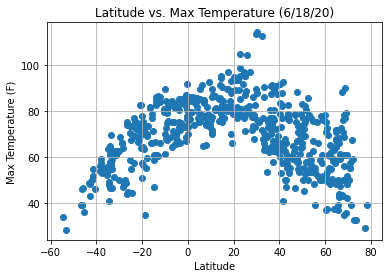

In [10]:
# Build a scatter plot for Latitude vs. Temperature w/ Labels
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.title("Latitude vs. Max Temperature (6/18/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1 Latitude vs Temperature.png")

# Show plot
plt.show()

#### This plot is showing that as you get closer to the equator (Latitude = 0), the Max Temperature in those cities tends to be higher. 

## Latitude vs. Humidity Plot

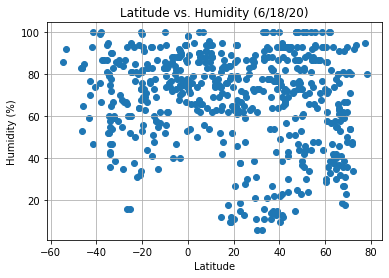

In [11]:
# Build a scatter plot for Latitude vs. Humidity w/ Labels
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.title("Latitude vs. Humidity (6/18/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2 Latitude vs Humidity.png")

# Show plot
plt.show()

#### This plot is showing that humidity tends to increase as the city is further away from the equator.

## Latitude vs. Cloudiness Plot

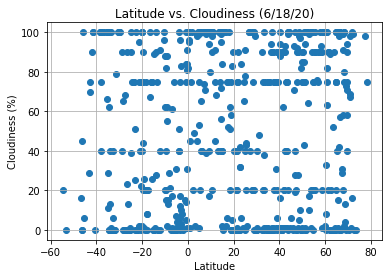

In [12]:
# Build a scatter plot for Latitude vs. Cloudiness w/ Labels
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.title("Latitude vs. Cloudiness (6/18/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3 Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### This plot is showing that a cities cloudiness is not really dependent on how far away from the equator it is. 

## Latitude vs. Wind Speed Plot

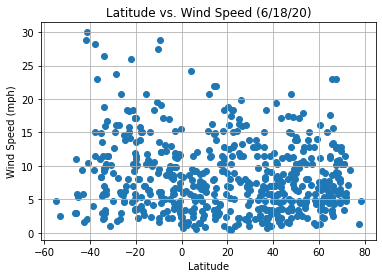

In [13]:
# Build a scatter plot for Latitude vs. Wind Speed w/ Labels
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"])
plt.title("Latitude vs. Wind Speed (6/18/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4 Latitude vs Wind Speed.png")

# Show plot
plt.show()

#### This plot is showing that a cities wind speed is not really dependent on how far away from the equator it is. 

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
clean_city_data.rename(columns = {'Lat':'Latitude'}, inplace = True)
northern_hemisphere = clean_city_data.loc[clean_city_data['Latitude']>=0]
southern_hemisphere = clean_city_data.loc[clean_city_data['Latitude']<0]

#Create list of latitudes
nh_latitude = northern_hemisphere['Latitude']
sh_latitude = southern_hemisphere['Latitude']

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
# Store wanted variables in new list
nh_variables = [northern_hemisphere['Max Temp'],northern_hemisphere['Humidity'],
                northern_hemisphere['Cloudiness'],northern_hemisphere['Wind Speed']]
sh_variables = [southern_hemisphere['Max Temp'],southern_hemisphere['Humidity'],
                southern_hemisphere['Cloudiness'],southern_hemisphere['Wind Speed']]

In [16]:
#Form empty lists to store regression values
slope_results = []
intercept_results = []
rvalue_results = []
regress_values = []
line_eq = []
r_squared = []

#Run for loop to get all regression values for Northern Hemisphere
for variable in range(len(nh_variables)):
    [slope, intercept, rvalue, pvalue, stderr] = linregress(nh_latitude, nh_variables[variable])
    slope_results.append(slope)
    intercept_results.append(intercept)
    rvalue_results.append(rvalue)
    regress_values.append(nh_latitude * slope_results[variable]+intercept_results[variable])
    line_eq.append("y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
    r_squared.append("R^2 = " + str(round(rvalue**2,3)))

#Run for loop to get all regression values for Southern Hemisphere
for variable in range(len(sh_variables)):
    [slope1, intercept1, rvalue1, pvalue1, stderr1] = linregress(sh_latitude, sh_variables[variable])
    slope_results.append(slope1)
    intercept_results.append(intercept1)
    rvalue_results.append(rvalue1)
    regress_values.append(sh_latitude * slope_results[variable+len(nh_variables)]+intercept_results[variable+len(nh_variables)])
    line_eq.append("y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)))
    r_squared.append("R^2 = " + str(round(rvalue1**2,3)))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

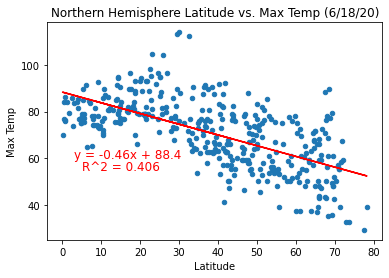

In [17]:
#Display and save plot w/ linear regression
northern_hemisphere.plot.scatter('Latitude', 'Max Temp', title = "Northern Hemisphere Latitude vs. Max Temp (6/18/20)")
plt.plot(nh_latitude,regress_values[0], color = 'r')
plt.annotate(line_eq[0],(3,60), fontsize=12, color = 'r')
plt.annotate(r_squared[0],(5,55), fontsize=12, color = 'r')
plt.savefig("output_data/Fig5 Northern Hemisphere Latitude vs. Max Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

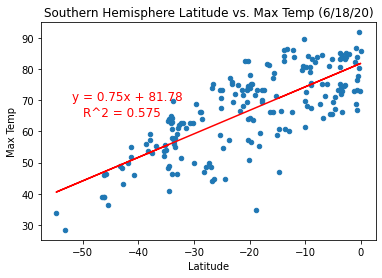

In [18]:
#Display and save plot w/ linear regression
southern_hemisphere.plot.scatter('Latitude', 'Max Temp', title = "Southern Hemisphere Latitude vs. Max Temp (6/18/20)")
plt.plot(sh_latitude,regress_values[4], color = 'r')
plt.annotate(line_eq[4],(-52,70), fontsize=12, color = 'r')
plt.annotate(r_squared[4],(-50,65), fontsize=12, color = 'r')
plt.savefig("output_data/Fig6 Southern Hemisphere Latitude vs. Max Temp.png")
plt.show()

##### Conclusion: A city closer to the equator in both hemispheres seemed to have a higher max temp according to the linear regression.  The Northern hemisphere cities showed a higher estimated max temp near the equator when comparing the y-intercepts, while the Southern hemisphere cities showed a more drastic decline in max temp as you moved further away from the equator as indicated by the slope.  The Southern hemisphere had a higher r-squared value and showed a strong coorelation indicating it's max temp was more accurately predicted with any given latitude. The Northern hemisphere only showed a moderate correlation between max temp and latitude but this was still the best correlation of all the variables looked into in this study.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

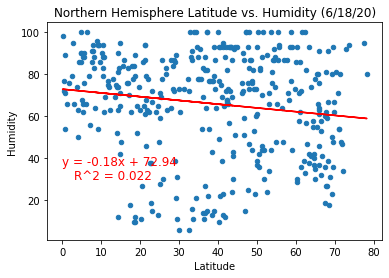

In [19]:
#Display and save plot w/ linear regression
northern_hemisphere.plot.scatter('Latitude', 'Humidity', title = "Northern Hemisphere Latitude vs. Humidity (6/18/20)")
plt.plot(nh_latitude,regress_values[1], color = 'r')
plt.annotate(line_eq[1],(0,37), fontsize=12, color = 'r')
plt.annotate(r_squared[1],(3,30), fontsize=12, color = 'r')
plt.savefig("output_data/Fig7 Northern Hemisphere Latitude vs. Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

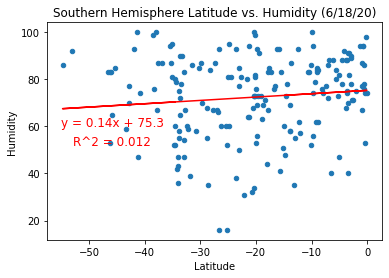

In [20]:
#Display and save plot w/ linear regression
southern_hemisphere.plot.scatter('Latitude', 'Humidity', title = "Southern Hemisphere Latitude vs. Humidity (6/18/20)")
plt.plot(sh_latitude,regress_values[5], color = 'r')
plt.annotate(line_eq[5],(-55,60), fontsize=12, color = 'r')
plt.annotate(r_squared[5],(-53,52), fontsize=12, color = 'r')
plt.savefig("output_data/Fig8 Southern Hemisphere Latitude vs. Humidity.png")
plt.show()

##### Conclusion: The humidity of a city seems to slightly increase with proximity to the equator as seen in both linear regressions trending towards 0 latitude.  Both hemispheres predicted approximately the same humidity near the equator and also a similar trend as a city's proximity increased from the equator.  However, both hemispheres showed very varied data and very low r-squared values indicating humidity cannot reliably be predicted solely by the latitude of a city.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

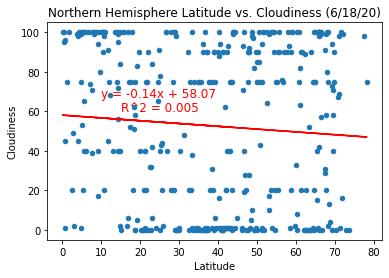

In [21]:
#Display and save plot w/ linear regression
northern_hemisphere.plot.scatter('Latitude', 'Cloudiness', title = "Northern Hemisphere Latitude vs. Cloudiness (6/18/20)")
plt.plot(nh_latitude,regress_values[2], color = 'r')
plt.annotate(line_eq[2],(10,67), fontsize=12, color = 'r')
plt.annotate(r_squared[2],(15,60), fontsize=12, color = 'r')
plt.savefig("output_data/Fig9 Northern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

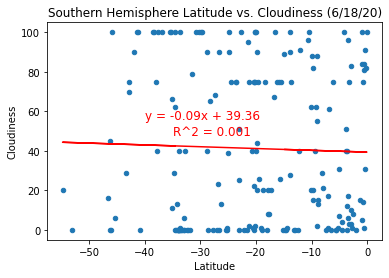

In [22]:
#Display and save plot w/ linear regression
southern_hemisphere.plot.scatter('Latitude', 'Cloudiness', title = "Southern Hemisphere Latitude vs. Cloudiness (6/18/20)")
plt.plot(sh_latitude,regress_values[6], color = 'r')
plt.annotate(line_eq[6],(-40,56), fontsize=12, color = 'r')
plt.annotate(r_squared[6],(-35,48), fontsize=12, color = 'r')
plt.savefig("output_data/Fig10 Southern Hemisphere Latitude vs. Cloudiness.png")
plt.show()

##### Conclusion: The cloudiness of a city showed opposite trends in the Northern and Southern hemispheres with proximity to the equator.  The Northern hemisphere predicted higher cloudiness near the equator and a steeper change in cloudiness as a city was further away from the equator as compared to the Southern hemisphere.  However, both hemispheres showed very varied data and even lower r-squared values than the humidity correlation and therefore the cloudiness cannot reliably be predicted solely by the latitude of a city.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

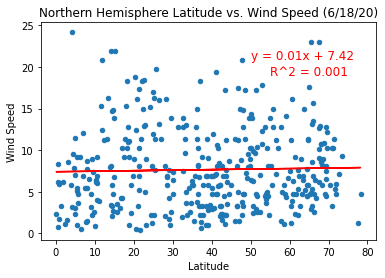

In [26]:
#Display and save plot w/ linear regression
northern_hemisphere.plot.scatter('Latitude', 'Wind Speed', title = "Northern Hemisphere Latitude vs. Wind Speed (6/18/20)")
plt.plot(nh_latitude,regress_values[3], color = 'r')
plt.annotate(line_eq[3],(50,21), fontsize=12, color = 'r')
plt.annotate(r_squared[3],(55,19), fontsize=12, color = 'r')
plt.savefig("output_data/Fig11 Northern Hemisphere Latitude vs. Wind Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

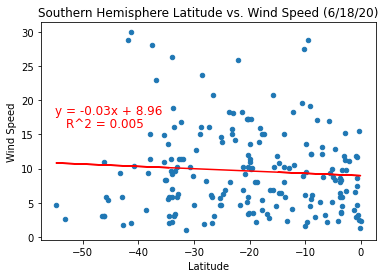

In [24]:
#Display and save plot w/ linear regression
southern_hemisphere.plot.scatter('Latitude', 'Wind Speed', title = "Southern Hemisphere Latitude vs. Wind Speed (6/18/20)")
plt.plot(sh_latitude,regress_values[7], color = 'r')
plt.annotate(line_eq[7],(-55,18), fontsize=12, color = 'r')
plt.annotate(r_squared[7],(-53,16), fontsize=12, color = 'r')
plt.savefig("output_data/Fig12 Southern Hemisphere Latitude vs. Wind Speed.png")
plt.show()

##### Conclusion: The wind speed of a city seems to slightly decrease with proximity to the equator as seen in both linear regressions trending towards 0 latitude.  The Southern hemisphere predicted a slightly higher wind speed near the equator compared to the Northern hemisphere and showed a slightly higher wind speed change as a city was further away from the equator. However, both hemispheres showed very varied data and very low r-squared values similar to the cloudiness correlations and therefore wind speed cannot reliably be predicted solely by the latitude of a city.